# Query Optimization

This lab will demonstrate ways to tune the performance of a database application by optimizing SQL queries.

## Pre-Requisites
1. Load the Account Dataset from `initialize_database.ipynb`

In [1]:
from LabDatabaseHandler import LabDatabaseHandler
from tqdm import tqdm
import  matplotlib.pyplot as plt
db = LabDatabaseHandler()

## Avoid using SELECT *
`SELECT *` returns all columns in a table that meet the constraints of the `SELECT` statement.

* Using `SELECT *` makes the response columns opaque; A change in database schema will change the results of the `SELECT`. This makes it harder to reason and profile the database.
* `SELECT *` often retrieves more data than needed, causing higher traffic load and adding latency.

Instead, specify the columns required explicitly.

In [ ]:
db.reset_logs()

samples = 10
sql = 'SELECT * FROM account_dataset'
print(f"AVG Time taken for SELECT *: {db.execute(sql, samples).print_duration()}")
sql = 'SELECT email FROM account_dataset'
print(f"AVG Time taken for targeted SELECT: {db.execute(sql, samples).print_duration()}")

db.generate_db_report()

## Use SELECT DISTINCT wisely

`SELECT DISTINCT` returns unique rows in a table that meet the constraints of the `SELECT` statement. However, it is expensive operation.

* When a single column is used multiple times for transformations, `DISTINCT` will perform these transforms before filtering records, even if the transformation does not affect the distinctness of the original value.

In [ ]:
db.reset_logs()

samples = 50
sql = 'SELECT DISTINCT age FROM account_dataset'
print(f"AVG Time taken for SELECT DISTINCT: {db.execute(sql, samples).print_duration()}")

sql = 'SELECT DISTINCT age, age*age, age*age*age FROM account_dataset'
print(f"AVG Time taken for SELECT DISTINCT with transforms: {db.execute(sql, samples).print_duration()}")

db.generate_db_report()

100%|██████████| 30/30 [00:21<00:00,  1.42it/s]
[========================>] Parsed 345961 bytes of 345961 (100.00%), queries: 3126, events: 0
LOG: Ok, generating html report...


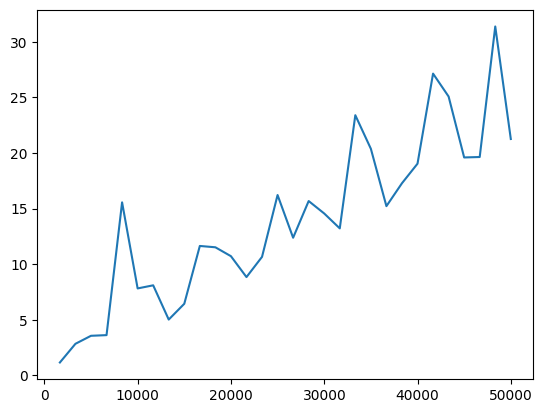

In [2]:
db.reset_logs()

samples = 50
repeat = 30

sql = f'select count(*) from account_dataset'
db.execute(sql)
count_rows = int(db.cur.fetchall()[0][0])
interval = int(count_rows / repeat)
db_sizes = list(range(interval, count_rows, interval))

durations = []
for i in tqdm(range(repeat)):
    sql = f"select distinct age, age*age, age*age*age from (select * from account_dataset limit {db_sizes[i]}) subages"
    durations.append(db.execute(sql, samples).duration_ms)

db.generate_db_report()

plt.plot(db_sizes, durations)